## Getting SARtsy!
Author: Ashley Nicole Warner

Data: https://sedac.ciesin.columbia.edu/data/set/sdei-high-res-extreme-heat-estimates-1983-2016/data-download 

Goal: Plot thermal map showing the rate of average temperature increase per year. Plot other fun relations. Maybe model a prediciton?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
from osgeo import gdal
import geopandas as gpd

# function to remove excess data points evenly throughout the set.
def sliceData(df, limit):
    for i in np.arange(limit):
        df = df[df.index % 2 == 0]
        df = df.reset_index(drop=True)
    return df

In [3]:
# This data file shows the rate of avg number of days an area is over X degrees per year.
path = 'sdei-high-res-extreme-heat-estimates-1983-2016-wbgtmax-trends-geotiff/GEHE-v1-wbgtmax-trends-1983-2016/'
file = 'wbgtmax28-trend-p05.tif'
ds = gdal.Open(path+file)

xyz = gdal.Translate(file[:-4]+'.xyz', ds)
xyz = None

In [4]:
# Loading in data frame
df = pd.read_csv(file[:-4]+'.xyz', sep=' ')
df.rename(columns={list(df)[0]:'longitude', list(df)[1]:'latitude', list(df)[2]:'value'}, inplace=True)

In [6]:
# Cleaning and shortening
df = df[df['value'] != -9999.0]

# creating Catalina data frame
df_c = df[df['latitude'].between(33.3, 33.5)]
df_c = df_c[df_c['longitude'].between(-119.2, -118.0)]
# df = df[df['value'] != 0]

df_main = sliceData(df, 5)

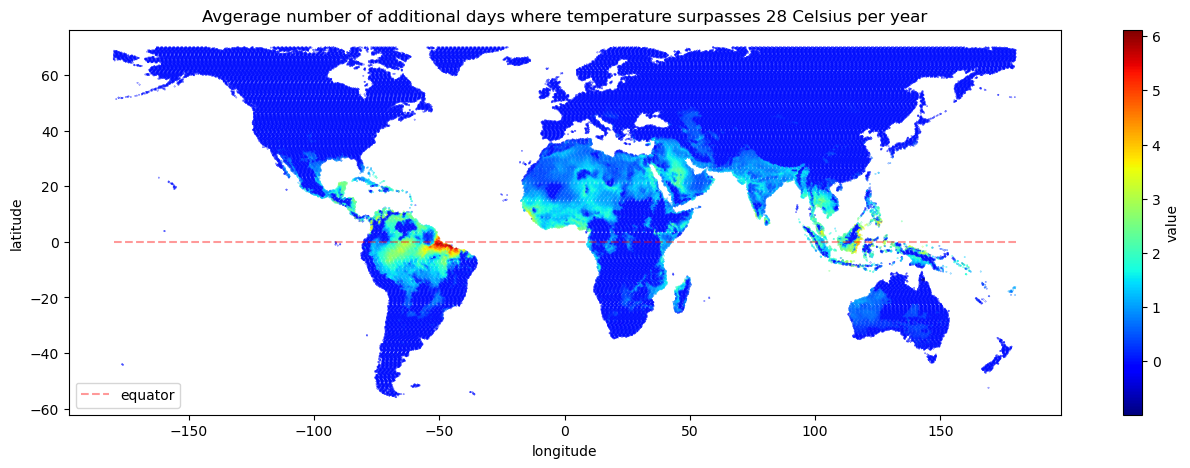

In [13]:
# fig, ax = plt.subplots()
plt.style.use('default')
long = np.linspace(df_main['longitude'].min(), df_main['longitude'].max())

df_main.plot(kind='scatter', x='longitude', y='latitude', s=0.05, figsize=[16,5],
        c='value', cmap=plt.get_cmap('jet'), colorbar=True)

#  equator, should you need it
plt.plot(long, [0]*len(long), color='red', label='equator', alpha=0.4, linestyle='dashed')

plt.title('Avgerage number of additional days where temperature surpasses 28 Celsius per year')
plt.legend()

plt.savefig('rateOfDays.png')

# plt.show
# fig = plot.get_figure()
# fig.savefig(path +"rateOfincreaeDaysAbove28.png")

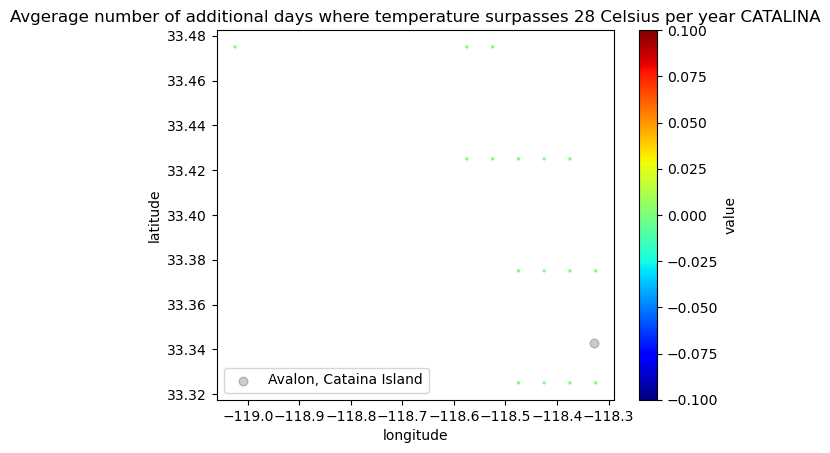

In [14]:
## Catalina Island Coords
df_c.plot(kind='scatter', x='longitude', y='latitude', s=2, 
        c='value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.scatter(-118.3282, 33.3428, color='black', label='Avalon, Cataina Island', s=40, alpha=0.2)

plt.title('Avgerage number of additional days where temperature surpasses 28 Celsius per year CATALINA')
plt.legend()

## PLAN
1. clean up data sets for above 28 per year. (maybe do every 3 years or something lol)
2. perhaps merge data into one data set, column of values for each year
3. plot a specific point value per year to look at trend.
4. perform regression based on trend and extrapolate those values


Catalina is at around 33.2906 -> 33.485 lat and -118.6183 -> -118.2969 long

In [17]:
path = 'sdei-high-res-extreme-heat-estimates-1983-2016-wbgtmax28-counts-geotiff/GEHE-v1-wbgtmax28-counts-1983-2016/'

for file in os.listdir(path):
    ds = gdal.Open(path+file)
    xyz = gdal.Translate(file[:-4]+'.xyz', ds)
xyz = None

In [28]:
# for xyz files
file_1983 = 'wbgtmax28.count.1983.xyz'
file_2016 = 'wbgtmax28.count.2016.xyz'

df_1983 = pd.read_csv(path + file_1983, sep=' ')
df_2016 = pd.read_csv(path + file_2016, sep=' ')

In [61]:
cleanedDataAr = [df_1983, df_2016]

# Cleaning and shortening

for i, df in enumerate(cleanedDataAr):
    df.rename(columns={list(df)[0]:'longitude', list(df)[1]:'latitude', list(df)[2]:'value'}, inplace=True)
    df = df[df['value'] != -9999]
    df = df[df['latitude'].between(33.3, 33.5)]
    df = df[df['longitude'].between(-118.7, -118.3)]    
    print(df.shape)
    cleanedDataAr[i] = df
    
# Cleaned data is only accessable through this array which bugs me, but whatever, a problem for another time
print(cleanedDataAr[0].shape)
df_1983 = cleanedDataAr[0]
df_2016 = cleanedDataAr[1]

(15, 3)
(15, 3)
(15, 3)


In [78]:
df_1983.rename(columns={list(df_1983)[2]:'1983'}, inplace=True)
df_2016.rename(columns={list(df_2016)[2]:'2016'}, inplace=True)

master_df = df_1983.join(df_2016['2016'])
master_df.head()

,longitude,latitude,1983,2016
5257227,-118.574999,33.474999,0,0
5257228,-118.524999,33.474999,0,0
5264427,-118.574999,33.424999,0,0
5264428,-118.524999,33.424999,0,0
5264429,-118.474999,33.424999,0,0


In [76]:
years = np.arange(1983, 2016+1, dtype=int)

Hilarious, this data set 